In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Path to your directory containing the MFCC CSV files
mfcc_dir = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'

# Initialize a list to store feature vectors
features = []

# Iterate over each file to calculate features
for file in os.listdir(mfcc_dir):
    if file.endswith('.csv'):
        filepath = os.path.join(mfcc_dir, file)
        mfcc_data = pd.read_csv(filepath, header=None)  # Load CSV without headers
        
        # Calculate features for the first five MFCC coefficients (first 5 rows)
        file_features = []
        for i in range(5):  # First 5 coefficients
            coeff_series = mfcc_data.iloc[i, :].values
            
            # Calculate the required features
            mean_val = np.mean(coeff_series)
            variance_val = np.var(coeff_series)
            skewness_val = skew(coeff_series)
            kurtosis_val = kurtosis(coeff_series)
            rms_val = np.sqrt(np.mean(coeff_series**2))
            peak_to_peak_ratio = np.ptp(coeff_series)  # Peak-to-peak value
            
            # Append features for this coefficient
            file_features.extend([mean_val, variance_val, skewness_val, kurtosis_val, rms_val, peak_to_peak_ratio])
        
        # Append file's features to the dataset
        features.append(file_features)

# Convert features to numpy array
X = np.array(features)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply K-means clustering to generate pseudo-labels
kmeans = KMeans(n_clusters=3, random_state=42)  # Change number of clusters as needed
pseudo_labels = kmeans.fit_predict(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, pseudo_labels, test_size=0.2, random_state=42)

# Train SVM model using the clusters as labels
svm = SVC(kernel='linear', random_state=42)  # You can change the kernel as needed
svm.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (on clustered labels): {accuracy * 100:.2f}%")


Accuracy (on clustered labels): 95.83%


In [5]:
import os

# Define the path to your folder containing the MFCC files
folder_path = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'  # Replace with your actual folder path

# List all CSV files in the folder and sort them by name
files = sorted([f for f in os.listdir(folder_path) if f.endswith('-MFCC.csv')])

# Rename each file to a sequential number
for i, file_name in enumerate(files, start=1):
    old_path = os.path.join(folder_path, file_name)
    new_path = os.path.join(folder_path, f"{i}.csv")
    os.rename(old_path, new_path)

print("Files renamed successfully.")


Files renamed successfully.


In [15]:
import yt_dlp

def download_songs(search_query, output_directory, category, num_songs=5):
    """
    Downloads 'num_songs' from YouTube using yt-dlp.
    
    Args:
    search_query (str): The search term for YouTube.
    output_directory (str): Directory to save the songs.
    category (str): The category label for the songs.
    num_songs (int): Number of songs to download.
    """
    # Create output path for the category
    output_path = f"{output_directory}/{category}/%(title)s.%(ext)s"
    
    # Set the options for yt-dlp
    ydl_opts = {
        'format': 'bestaudio/best',  # Get the best audio quality
        'outtmpl': output_path,  # Output template (where the song will be saved)
        'noplaylist': True,  # Don't download playlists, only individual videos
        'max_downloads': num_songs,  # Limit the number of downloads per category
        'quiet': False,  # Show download progress
        'extractaudio': True,  # Extract audio only
    }

    # Ensure that the search query returns more than one result
    search_url = f"ytsearch{num_songs}:{search_query}"

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        # Download the songs using the search URL
        ydl.download([search_url])

# Example categories and search queries:
# download_songs('Indian National Anthem', 'songs', 'national_anthem', num_songs=5)
# download_songs('Marathi Bhav Geet', 'songs', 'bhav_geet', num_songs=5)
# download_songs('Marathi Lavni songs', 'songs', 'lavni', num_songs=5)
download_songs('Hindi songs Asha Bhosale', 'songs', 'asha_bhosale', num_songs=5)
download_songs('Hindi songs Kishore Kumar', 'songs', 'kishore_kumar', num_songs=5)
download_songs('Michael Jackson English songs', 'songs', 'michael_jackson', num_songs=5)


[youtube:search] Extracting URL: ytsearch5:Hindi songs Asha Bhosale
[download] Downloading playlist: Hindi songs Asha Bhosale
[youtube:search] query "Hindi songs Asha Bhosale": Downloading web client config
[youtube:search] query "Hindi songs Asha Bhosale" page 1: Downloading API JSON
[youtube:search] Playlist Hindi songs Asha Bhosale: Downloading 5 items of 5
[download] Downloading item 1 of 5
[youtube] Extracting URL: https://www.youtube.com/watch?v=SOa2kBaULhw
[youtube] SOa2kBaULhw: Downloading webpage
[youtube] SOa2kBaULhw: Downloading ios player API JSON
[youtube] SOa2kBaULhw: Downloading mweb player API JSON
[youtube] SOa2kBaULhw: Downloading m3u8 information
[info] SOa2kBaULhw: Downloading 1 format(s): 251
[download] Destination: songs/asha_bhosale/Asha Bhosle Hindi Bollywood Best Songs  Bollywood Collection.webm
[download] 100% of   81.21MiB in 00:00:16 at 5.04MiB/s   
[download] Downloading item 2 of 5
[youtube] Extracting URL: https://www.youtube.com/watch?v=7MjZYvAAakI
[yout

KeyboardInterrupt: 

In [14]:
import os
import numpy as np
import librosa
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
def extract_features_from_mfcc(mfcc_file_path, num_coefficients=5):
    """
    Extracts statistical features from the first `num_coefficients` MFCC coefficients.
    
    Features: Mean, Variance, Skewness, Kurtosis, RMS, Peak-to-Peak Ratio
    """
    # Read the MFCC data from CSV file (assuming each row is a coefficient)
    mfcc_data = pd.read_csv(mfcc_file_path, header=None).values
    
    features = []
    
    # Process each MFCC coefficient (up to the first 5)
    for i in range(num_coefficients):
        coeff_series = mfcc_data[i, :]  # Get the data for the i-th coefficient
        
        # Calculate features
        mean_val = np.mean(coeff_series)
        variance_val = np.var(coeff_series)
        skewness_val = skew(coeff_series)
        kurtosis_val = kurtosis(coeff_series)
        rms_val = np.sqrt(np.mean(coeff_series**2))
        peak_to_peak_ratio = np.ptp(coeff_series)  # Peak-to-peak value
        
        # Append features
        features.extend([mean_val, variance_val, skewness_val, kurtosis_val, rms_val, peak_to_peak_ratio])
    
    return features


In [11]:
def load_and_extract_features(mfcc_dir, num_coefficients=5):
    """
    Loads all MFCC files from a given directory and extracts features.
    
    Args:
    - mfcc_dir: Directory containing the MFCC CSV files.
    - num_coefficients: Number of MFCC coefficients to use (first 5 by default).
    
    Returns:
    - features: List of extracted features from all songs.
    - file_names: List of file names (for labeling).
    """
    features = []
    file_names = []
    
    # Loop through all files in the MFCC directory
    for file_name in os.listdir(mfcc_dir):
        if file_name.endswith('.csv'):
            file_path = os.path.join(mfcc_dir, file_name)
            
            # Extract features for the given MFCC file
            file_features = extract_features_from_mfcc(file_path, num_coefficients)
            features.append(file_features)
            file_names.append(file_name)
    
    return np.array(features), file_names


In [12]:
def perform_clustering(features, num_clusters=6):
    """
    Perform K-means clustering on the given features.
    
    Args:
    - features: Feature matrix (rows are songs, columns are feature values).
    - num_clusters: Number of clusters to form.
    
    Returns:
    - cluster_labels: List of cluster assignments for each song.
    """
    # Standardize the features (mean=0, std=1)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    
    return cluster_labels


In [13]:
def visualize_clusters(features, cluster_labels):
    """
    Visualize the clustering results using PCA.
    
    Args:
    - features: Feature matrix (rows are songs, columns are feature values).
    - cluster_labels: Cluster labels for each song.
    """
    # Reduce the dimensionality using PCA
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    
    # Create scatter plot of the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title('K-means Clustering of Songs')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


File: 06-MFCC.csv -> Cluster: 3
File: 97-MFCC.csv -> Cluster: 4
File: 64-MFCC.csv -> Cluster: 2
File: 07-MFCC.csv -> Cluster: 5
File: 65-MFCC.csv -> Cluster: 3
File: 36-MFCC.csv -> Cluster: 3
File: 114-MFCC.csv -> Cluster: 0
File: 05-MFCC.csv -> Cluster: 4
File: 43-MFCC.csv -> Cluster: 3
File: 96-MFCC.csv -> Cluster: 4
File: 111-MFCC.csv -> Cluster: 4
File: 74-MFCC.csv -> Cluster: 0
File: 14-MFCC.csv -> Cluster: 3
File: 108-MFCC.csv -> Cluster: 2
File: 20-MFCC.csv -> Cluster: 0
File: 26-MFCC.csv -> Cluster: 4
File: 92-MFCC.csv -> Cluster: 3
File: 21-MFCC.csv -> Cluster: 3
File: 02-MFCC.csv -> Cluster: 2
File: 109-MFCC.csv -> Cluster: 3
File: 09-MFCC.csv -> Cluster: 1
File: 40-MFCC.csv -> Cluster: 3
File: 77-MFCC.csv -> Cluster: 3
File: 22-MFCC.csv -> Cluster: 3
File: 04-MFCC.csv -> Cluster: 3
File: 35-MFCC.csv -> Cluster: 2
File: 101-MFCC.csv -> Cluster: 5
File: 55-MFCC.csv -> Cluster: 2
File: 61-MFCC.csv -> Cluster: 2
File: 54-MFCC.csv -> Cluster: 3
File: 60-MFCC.csv -> Cluster: 3
Fil

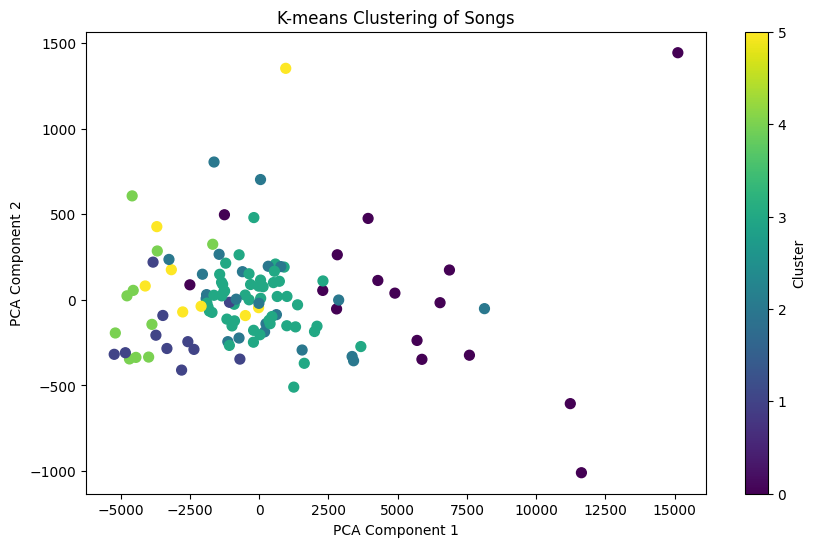

In [21]:
# Define the path to the directory containing your MFCC CSV files
mfcc_dir = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'

# Extract features from all MFCC files
features, file_names = load_and_extract_features(mfcc_dir, num_coefficients=5)

# Perform K-means clustering
cluster_labels = perform_clustering(features, num_clusters=6)

# Print the cluster assignments for each song
for idx, (file_name, cluster) in enumerate(zip(file_names, cluster_labels)):
    print(f"File: {file_name} -> Cluster: {cluster}")

# Optional: Visualize the clusters
visualize_clusters(features, cluster_labels)


In [22]:
# Group files by their assigned clusters
def group_files_by_cluster(file_names, cluster_labels):
    """
    Group the filenames by the clusters they belong to.
    
    Args:
    - file_names: List of filenames (songs).
    - cluster_labels: The cluster labels for each song.
    
    Returns:
    - A dictionary with cluster labels as keys and lists of filenames as values.
    """
    clusters = {}
    
    # Iterate through the cluster labels and file names
    for file_name, cluster in zip(file_names, cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(file_name)
    
    return clusters

# Get the clusters with their respective file names
clusters = group_files_by_cluster(file_names, cluster_labels)

# Print the files in each cluster
for cluster_num, files in clusters.items():
    print(f"Cluster {cluster_num}:")
    for file in files:
        print(f"  - {file}")
    print()  # Add a newline between clusters


Cluster 3:
  - 06-MFCC.csv
  - 65-MFCC.csv
  - 36-MFCC.csv
  - 43-MFCC.csv
  - 14-MFCC.csv
  - 92-MFCC.csv
  - 21-MFCC.csv
  - 109-MFCC.csv
  - 40-MFCC.csv
  - 77-MFCC.csv
  - 22-MFCC.csv
  - 04-MFCC.csv
  - 54-MFCC.csv
  - 60-MFCC.csv
  - 89-MFCC.csv
  - 53-MFCC.csv
  - 69-MFCC.csv
  - 37-MFCC.csv
  - 58-MFCC.csv
  - 62-MFCC.csv
  - 33-MFCC.csv
  - 25-MFCC.csv
  - 113-MFCC.csv
  - 57-MFCC.csv
  - 47-MFCC.csv
  - 15-MFCC.csv
  - 19-MFCC.csv
  - 48-MFCC.csv
  - 39-MFCC.csv
  - 99-MFCC.csv
  - 73-MFCC.csv
  - 85-MFCC.csv
  - 49-MFCC.csv
  - 79-MFCC.csv
  - 68-MFCC.csv
  - 110-MFCC.csv
  - 56-MFCC.csv
  - 76-MFCC.csv
  - 98-MFCC.csv
  - 13-MFCC.csv
  - 11-MFCC.csv
  - 86-MFCC.csv
  - 72-MFCC.csv
  - 112-MFCC.csv
  - 78-MFCC.csv
  - 70-MFCC.csv
  - 52-MFCC.csv
  - 41-MFCC.csv
  - 91-MFCC.csv

Cluster 4:
  - 97-MFCC.csv
  - 05-MFCC.csv
  - 96-MFCC.csv
  - 111-MFCC.csv
  - 26-MFCC.csv
  - 67-MFCC.csv
  - 28-MFCC.csv
  - 50-MFCC.csv
  - 100-MFCC.csv
  - 83-MFCC.csv

Cluster 2:
  - 64-MFCC.csv

File: 06-MFCC.csv -> Cluster: 4
File: 97-MFCC.csv -> Cluster: 2
File: 64-MFCC.csv -> Cluster: 5
File: 07-MFCC.csv -> Cluster: 3
File: 65-MFCC.csv -> Cluster: 4
File: 36-MFCC.csv -> Cluster: 1
File: 114-MFCC.csv -> Cluster: 0
File: 05-MFCC.csv -> Cluster: 2
File: 43-MFCC.csv -> Cluster: 1
File: 96-MFCC.csv -> Cluster: 2
File: 111-MFCC.csv -> Cluster: 2
File: 74-MFCC.csv -> Cluster: 0
File: 14-MFCC.csv -> Cluster: 4
File: 108-MFCC.csv -> Cluster: 5
File: 20-MFCC.csv -> Cluster: 0
File: 26-MFCC.csv -> Cluster: 2
File: 92-MFCC.csv -> Cluster: 1
File: 21-MFCC.csv -> Cluster: 4
File: 02-MFCC.csv -> Cluster: 5
File: 109-MFCC.csv -> Cluster: 4
File: 09-MFCC.csv -> Cluster: 2
File: 40-MFCC.csv -> Cluster: 1
File: 77-MFCC.csv -> Cluster: 4
File: 22-MFCC.csv -> Cluster: 4
File: 04-MFCC.csv -> Cluster: 4
File: 35-MFCC.csv -> Cluster: 5
File: 101-MFCC.csv -> Cluster: 3
File: 55-MFCC.csv -> Cluster: 5
File: 61-MFCC.csv -> Cluster: 5
File: 54-MFCC.csv -> Cluster: 4
File: 60-MFCC.csv -> Cluster: 1
Fil

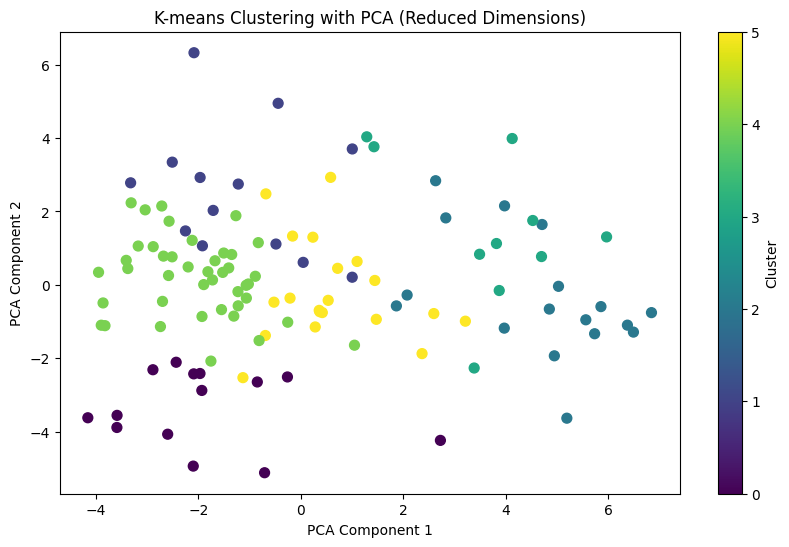

In [19]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to extract features from MFCC files
def extract_features_from_mfcc(mfcc_file_path, num_coefficients=5):
    """
    Extracts statistical features from the first `num_coefficients` MFCC coefficients.
    Features: Mean, Variance, Skewness, Kurtosis, RMS, Peak-to-Peak Ratio
    """
    # Read the MFCC data from CSV file (assuming each row is a coefficient)
    mfcc_data = pd.read_csv(mfcc_file_path, header=None).values
    
    features = []
    
    # Process each MFCC coefficient (up to the first 5)
    for i in range(num_coefficients):
        coeff_series = mfcc_data[i, :]  # Get the data for the i-th coefficient
        
        # Calculate features
        mean_val = np.mean(coeff_series)
        variance_val = np.var(coeff_series)
        skewness_val = skew(coeff_series)
        kurtosis_val = kurtosis(coeff_series)
        rms_val = np.sqrt(np.mean(coeff_series**2))
        peak_to_peak_ratio = np.ptp(coeff_series)  # Peak-to-peak value
        
        # Append features
        features.extend([mean_val, variance_val, skewness_val, kurtosis_val, rms_val, peak_to_peak_ratio])
    
    return features

# Function to load data and extract features from all MFCC files
def load_and_extract_features(mfcc_dir, num_coefficients=5):
    """
    Loads all MFCC files from a given directory and extracts features.
    
    Args:
    - mfcc_dir: Directory containing the MFCC CSV files.
    - num_coefficients: Number of MFCC coefficients to use (first 5 by default).
    
    Returns:
    - features: List of extracted features from all songs.
    - file_names: List of file names (for labeling).
    """
    features = []
    file_names = []
    
    # Loop through all files in the MFCC directory
    for file_name in os.listdir(mfcc_dir):
        if file_name.endswith('.csv'):
            file_path = os.path.join(mfcc_dir, file_name)
            
            # Extract features for the given MFCC file
            file_features = extract_features_from_mfcc(file_path, num_coefficients)
            features.append(file_features)
            file_names.append(file_name)
    
    return np.array(features), file_names

# Function to apply PCA for dimensionality reduction
def apply_pca(features, n_components=10):
    """
    Apply PCA to reduce the dimensionality of the features.

    Args:
    - features: The feature matrix (songs x 30 features).
    - n_components: The number of principal components to keep.

    Returns:
    - Reduced features (songs x n_components).
    """
    # Standardize the features before applying PCA
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features_scaled)

    return reduced_features

# Function to perform K-means clustering with PCA
def perform_clustering_with_pca(features, num_clusters=6, n_components=5):
    """
    Apply PCA to reduce dimensionality, then perform K-means clustering.
    
    Args:
    - features: The feature matrix (songs x 30 features).
    - num_clusters: Number of clusters for K-means.
    - n_components: Number of components to retain with PCA.
    
    Returns:
    - cluster_labels: The cluster labels for each song.
    """
    # Apply PCA to reduce the dimensionality of the features
    reduced_features = apply_pca(features, n_components=n_components)

    # Perform K-means clustering on the reduced features
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_features)

    return cluster_labels

# Function to visualize the clusters using PCA
def visualize_clusters_with_pca(features, cluster_labels, n_components=2):
    """
    Visualize the clustering results using PCA.

    Args:
    - features: The original feature matrix (songs x 30 features).
    - cluster_labels: Cluster labels for each song.
    - n_components: Number of components to use for PCA (2 for 2D visualization).
    """
    # Apply PCA to reduce features to 2 dimensions for visualization
    reduced_features = apply_pca(features, n_components=n_components)

    # Create a scatter plot of the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title('K-means Clustering with PCA (Reduced Dimensions)')
    plt.xlabel(f'PCA Component 1')
    plt.ylabel(f'PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Main Execution
# Define the path to the directory containing your MFCC CSV files
mfcc_dir = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'

# Extract features from all MFCC files
features, file_names = load_and_extract_features(mfcc_dir, num_coefficients=5)

# Perform K-means clustering with PCA
cluster_labels = perform_clustering_with_pca(features, num_clusters=6, n_components=5)

# Print the cluster assignments for each song
for idx, (file_name, cluster) in enumerate(zip(file_names, cluster_labels)):
    print(f"File: {file_name} -> Cluster: {cluster}")

# Optional: Visualize the clusters if using 2 components for PCA visualization
visualize_clusters_with_pca(features, cluster_labels, n_components=2)


In [20]:

# Group files by their assigned clusters
def group_files_by_cluster(file_names, cluster_labels):
    """
    Group the filenames by the clusters they belong to.
    
    Args:
    - file_names: List of filenames (songs).
    - cluster_labels: The cluster labels for each song.
    
    Returns:
    - A dictionary with cluster labels as keys and lists of filenames as values.
    """
    clusters = {}
    
    # Iterate through the cluster labels and file names
    for file_name, cluster in zip(file_names, cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(file_name)
    
    return clusters

# Get the clusters with their respective file names
clusters = group_files_by_cluster(file_names, cluster_labels)

# Print the files in each cluster
for cluster_num, files in clusters.items():
    print(f"Cluster {cluster_num}:")
    for file in files:
        print(f"  - {file}")
    print()  # Add a newline between clusters


Cluster 4:
  - 06-MFCC.csv
  - 65-MFCC.csv
  - 14-MFCC.csv
  - 21-MFCC.csv
  - 109-MFCC.csv
  - 77-MFCC.csv
  - 22-MFCC.csv
  - 04-MFCC.csv
  - 54-MFCC.csv
  - 89-MFCC.csv
  - 53-MFCC.csv
  - 69-MFCC.csv
  - 37-MFCC.csv
  - 58-MFCC.csv
  - 62-MFCC.csv
  - 33-MFCC.csv
  - 113-MFCC.csv
  - 57-MFCC.csv
  - 47-MFCC.csv
  - 15-MFCC.csv
  - 115-MFCC.csv
  - 19-MFCC.csv
  - 48-MFCC.csv
  - 39-MFCC.csv
  - 99-MFCC.csv
  - 73-MFCC.csv
  - 88-MFCC.csv
  - 85-MFCC.csv
  - 79-MFCC.csv
  - 68-MFCC.csv
  - 56-MFCC.csv
  - 104-MFCC.csv
  - 98-MFCC.csv
  - 13-MFCC.csv
  - 11-MFCC.csv
  - 86-MFCC.csv
  - 72-MFCC.csv
  - 112-MFCC.csv
  - 08-MFCC.csv
  - 70-MFCC.csv
  - 41-MFCC.csv
  - 91-MFCC.csv

Cluster 2:
  - 97-MFCC.csv
  - 05-MFCC.csv
  - 96-MFCC.csv
  - 111-MFCC.csv
  - 26-MFCC.csv
  - 09-MFCC.csv
  - 63-MFCC.csv
  - 18-MFCC.csv
  - 71-MFCC.csv
  - 28-MFCC.csv
  - 84-MFCC.csv
  - 46-MFCC.csv
  - 50-MFCC.csv
  - 51-MFCC.csv
  - 100-MFCC.csv
  - 83-MFCC.csv
  - 102-MFCC.csv

Cluster 5:
  - 64-MFCC.c

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(features, cluster_labels)
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.036694291729661564
Davies-Bouldin Score: 3.193381005960061


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

# Define the path to the folder containing the MFCC CSV files
mfcc_folder = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'  # Replace with your actual path

# Step 1: Define a function to extract features from an MFCC CSV file
def extract_features_from_mfcc_file(file_path):
    # Load the MFCC data from the CSV file
    mfcc_data = pd.read_csv(file_path, header=None).values  # Shape (20, time-steps)
    
    # Compute statistical features (mean, skewness, kurtosis, RMS, peak-to-peak ratio) for each coefficient
    features = []
    for coeff in mfcc_data:
        features.append(np.mean(coeff))
        features.append(skew(coeff))
        features.append(kurtosis(coeff))
        features.append(np.sqrt(np.mean(coeff ** 2)))  # RMS
        features.append(np.ptp(coeff))  # Peak-to-Peak Ratio
    return features

# Step 2: Extract features for all files in the folder
file_names = []
features = []

for file in os.listdir(mfcc_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(mfcc_folder, file)
        file_names.append(file)
        features.append(extract_features_from_mfcc_file(file_path))

# Step 3: Apply PCA to reduce feature dimensionality
pca = PCA(n_components=25)  # Adjust number of components as needed
reduced_features = pca.fit_transform(features)

# Step 4: Perform KMeans Clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(reduced_features)

# Step 5: Group files by cluster
def group_files_by_cluster(file_names, cluster_labels):
    clusters = {}
    for file_name, cluster in zip(file_names, cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(file_name)
    return clusters

clusters = group_files_by_cluster(file_names, cluster_labels)

# Print the files in each cluster
for cluster_num, files in clusters.items():
    print(f"Cluster {cluster_num}:")
    for file in files:
        print(f"  - {file}")
    print()  # Add a newline between clusters


Cluster 4:
  - 06-MFCC.csv
  - 36-MFCC.csv
  - 43-MFCC.csv
  - 21-MFCC.csv
  - 77-MFCC.csv
  - 22-MFCC.csv
  - 54-MFCC.csv
  - 58-MFCC.csv
  - 32-MFCC.csv
  - 62-MFCC.csv
  - 33-MFCC.csv
  - 113-MFCC.csv
  - 15-MFCC.csv
  - 42-MFCC.csv
  - 48-MFCC.csv
  - 39-MFCC.csv
  - 99-MFCC.csv
  - 88-MFCC.csv
  - 85-MFCC.csv
  - 49-MFCC.csv
  - 56-MFCC.csv
  - 76-MFCC.csv
  - 104-MFCC.csv
  - 13-MFCC.csv
  - 11-MFCC.csv
  - 10-MFCC.csv
  - 72-MFCC.csv
  - 112-MFCC.csv
  - 41-MFCC.csv
  - 91-MFCC.csv

Cluster 2:
  - 97-MFCC.csv
  - 05-MFCC.csv
  - 96-MFCC.csv
  - 111-MFCC.csv
  - 26-MFCC.csv
  - 09-MFCC.csv
  - 61-MFCC.csv
  - 67-MFCC.csv
  - 63-MFCC.csv
  - 66-MFCC.csv
  - 27-MFCC.csv
  - 80-MFCC.csv
  - 18-MFCC.csv
  - 82-MFCC.csv
  - 28-MFCC.csv
  - 84-MFCC.csv
  - 29-MFCC.csv
  - 46-MFCC.csv
  - 50-MFCC.csv
  - 51-MFCC.csv
  - 59-MFCC.csv
  - 100-MFCC.csv
  - 83-MFCC.csv
  - 93-MFCC.csv
  - 23-MFCC.csv

Cluster 3:
  - 64-MFCC.csv
  - 07-MFCC.csv
  - 108-MFCC.csv
  - 92-MFCC.csv
  - 02-MFCC.csv

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

# Define the path to the folder containing the MFCC CSV files
mfcc_folder = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'  # Replace with your actual path

# Step 1: Define a function to extract features from an MFCC CSV file
def extract_features_from_mfcc_file(file_path):
    # Load the MFCC data from the CSV file
    mfcc_data = pd.read_csv(file_path, header=None).values  # Shape (20, time-steps)
    
    # Compute statistical features (mean, skewness, kurtosis, RMS, peak-to-peak ratio) for each coefficient
    features = []
    for coeff in mfcc_data:
        features.append(np.mean(coeff))
        features.append(skew(coeff))
        features.append(kurtosis(coeff))
        features.append(np.sqrt(np.mean(coeff ** 2)))  # RMS
        features.append(np.ptp(coeff))  # Peak-to-Peak Ratio
    return features

# Step 2: Extract features for all files in the folder
file_names = []
features = []

for file in os.listdir(mfcc_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(mfcc_folder, file)
        file_names.append(file)
        features.append(extract_features_from_mfcc_file(file_path))

# Step 3: Apply PCA to reduce feature dimensionality
pca = PCA(n_components=25)  # Adjust number of components as needed
reduced_features = pca.fit_transform(features)

# Step 4: Perform KMeans Clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(reduced_features)

# Step 5: Group files by cluster
def group_files_by_cluster(file_names, cluster_labels):
    clusters = {}
    for file_name, cluster in zip(file_names, cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(file_name)
    return clusters

clusters = group_files_by_cluster(file_names, cluster_labels)

# Print the files in each cluster
for cluster_num, files in clusters.items():
    print(f"Cluster {cluster_num}:")
    for file in files:
        print(f"  - {file}")
    print()  # Add a newline between clusters


Cluster 0:
  - 06-MFCC.csv
  - 43-MFCC.csv
  - 21-MFCC.csv
  - 77-MFCC.csv
  - 04-MFCC.csv
  - 12-MFCC.csv
  - 32-MFCC.csv
  - 62-MFCC.csv
  - 33-MFCC.csv
  - 113-MFCC.csv
  - 48-MFCC.csv
  - 39-MFCC.csv
  - 99-MFCC.csv
  - 85-MFCC.csv
  - 49-MFCC.csv
  - 79-MFCC.csv
  - 56-MFCC.csv
  - 13-MFCC.csv
  - 11-MFCC.csv
  - 72-MFCC.csv
  - 112-MFCC.csv
  - 41-MFCC.csv
  - 91-MFCC.csv

Cluster 1:
  - 97-MFCC.csv
  - 05-MFCC.csv
  - 96-MFCC.csv
  - 111-MFCC.csv
  - 26-MFCC.csv
  - 09-MFCC.csv
  - 61-MFCC.csv
  - 67-MFCC.csv
  - 63-MFCC.csv
  - 105-MFCC.csv
  - 66-MFCC.csv
  - 38-MFCC.csv
  - 27-MFCC.csv
  - 80-MFCC.csv
  - 18-MFCC.csv
  - 82-MFCC.csv
  - 28-MFCC.csv
  - 84-MFCC.csv
  - 29-MFCC.csv
  - 46-MFCC.csv
  - 01-MFCC.csv
  - 50-MFCC.csv
  - 51-MFCC.csv
  - 59-MFCC.csv
  - 100-MFCC.csv
  - 83-MFCC.csv
  - 102-MFCC.csv
  - 93-MFCC.csv
  - 23-MFCC.csv

Cluster 3:
  - 64-MFCC.csv
  - 07-MFCC.csv
  - 65-MFCC.csv
  - 74-MFCC.csv
  - 02-MFCC.csv
  - 109-MFCC.csv
  - 40-MFCC.csv
  - 101-MFCC.c

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

# Define the path to the folder containing the MFCC CSV files
mfcc_folder = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'  # Replace with your actual path

# Step 1: Define a function to extract features from an MFCC CSV file
def extract_features_from_mfcc_file(file_path):
    # Load the MFCC data from the CSV file
    mfcc_data = pd.read_csv(file_path, header=None).values  # Shape (20, time-steps)
    
    # Compute statistical features (mean, std deviation, skewness, kurtosis, RMS, peak-to-peak ratio) for each coefficient
    features = []
    for coeff in mfcc_data:
        features.append(np.mean(coeff))
        features.append(np.std(coeff))            # Standard deviation
        features.append(skew(coeff))
        features.append(kurtosis(coeff))
        features.append(np.sqrt(np.mean(coeff ** 2)))  # RMS
        features.append(np.ptp(coeff))            # Peak-to-Peak Ratio
    return features

# Step 2: Extract features for all files in the folder
file_names = []
features = []

for file in os.listdir(mfcc_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(mfcc_folder, file)
        file_names.append(file)
        features.append(extract_features_from_mfcc_file(file_path))

# Step 3: Apply PCA to reduce feature dimensionality
pca = PCA(n_components=10)  # Adjust number of components as needed
reduced_features = pca.fit_transform(features)

# Step 4: Perform KMeans Clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(reduced_features)

# Step 5: Group files by cluster
def group_files_by_cluster(file_names, cluster_labels):
    clusters = {}
    for file_name, cluster in zip(file_names, cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(file_name)
    return clusters

clusters = group_files_by_cluster(file_names, cluster_labels)

# Print the files in each cluster
for cluster_num, files in clusters.items():
    print(f"Cluster {cluster_num}:")
    for file in files:
        print(f"  - {file}")
    print()  # Add a newline between clusters


Cluster 2:
  - 06-MFCC.csv
  - 65-MFCC.csv
  - 36-MFCC.csv
  - 43-MFCC.csv
  - 21-MFCC.csv
  - 109-MFCC.csv
  - 40-MFCC.csv
  - 77-MFCC.csv
  - 22-MFCC.csv
  - 04-MFCC.csv
  - 54-MFCC.csv
  - 24-MFCC.csv
  - 58-MFCC.csv
  - 12-MFCC.csv
  - 32-MFCC.csv
  - 62-MFCC.csv
  - 33-MFCC.csv
  - 113-MFCC.csv
  - 15-MFCC.csv
  - 42-MFCC.csv
  - 48-MFCC.csv
  - 39-MFCC.csv
  - 99-MFCC.csv
  - 88-MFCC.csv
  - 85-MFCC.csv
  - 49-MFCC.csv
  - 79-MFCC.csv
  - 68-MFCC.csv
  - 110-MFCC.csv
  - 56-MFCC.csv
  - 76-MFCC.csv
  - 104-MFCC.csv
  - 13-MFCC.csv
  - 11-MFCC.csv
  - 10-MFCC.csv
  - 72-MFCC.csv
  - 112-MFCC.csv
  - 41-MFCC.csv
  - 91-MFCC.csv

Cluster 1:
  - 97-MFCC.csv
  - 05-MFCC.csv
  - 96-MFCC.csv
  - 111-MFCC.csv
  - 108-MFCC.csv
  - 26-MFCC.csv
  - 09-MFCC.csv
  - 61-MFCC.csv
  - 67-MFCC.csv
  - 63-MFCC.csv
  - 105-MFCC.csv
  - 66-MFCC.csv
  - 38-MFCC.csv
  - 27-MFCC.csv
  - 80-MFCC.csv
  - 18-MFCC.csv
  - 71-MFCC.csv
  - 82-MFCC.csv
  - 28-MFCC.csv
  - 84-MFCC.csv
  - 29-MFCC.csv
  - 46-MF